In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef
import xgboost
from scipy.constants import G

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [25]:
df_koi = pd.read_csv(r'..\data\toi\toi.csv')
koi_useful_columns = ['tfopwg_disp', 'ra', 'dec', 'st_pmra', 'st_pmdec', 'pl_tranmid', 'pl_orbper', 'pl_trandurh',
                      'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist', 'st_teff', 'st_logg', 'st_rad']

koi_cleaned = df_koi[koi_useful_columns]

In [26]:
koi_cleaned = koi_cleaned[koi_cleaned['tfopwg_disp'].isin(['CP', 'FA', 'FP', 'KP'])]

In [27]:
target_simplifier = {'CP': 1, 'KP': 1, 'FA': 0, 'FP': 0}

In [28]:
koi_cleaned['is_planet'] = koi_cleaned['tfopwg_disp'].map(target_simplifier)
koi_cleaned.drop(columns = ['tfopwg_disp'], inplace = True)

In [29]:
""" koi_fp = koi_cleaned[(koi_cleaned['koi_disposition'] == 'FALSE POSITIVE')|(koi_cleaned['koi_pdisposition'] == 'FALSE POSITIVE')]
koi_diff = koi_fp[koi_fp['koi_disposition'] != koi_fp['koi_pdisposition']]
diff_ind = koi_diff.index """

" koi_fp = koi_cleaned[(koi_cleaned['koi_disposition'] == 'FALSE POSITIVE')|(koi_cleaned['koi_pdisposition'] == 'FALSE POSITIVE')]\nkoi_diff = koi_fp[koi_fp['koi_disposition'] != koi_fp['koi_pdisposition']]\ndiff_ind = koi_diff.index "

In [30]:
""" koi_cleaned.drop(index = diff_ind, inplace = True)
koi_cleaned.drop(columns = ['koi_pdisposition'], inplace = True) """

" koi_cleaned.drop(index = diff_ind, inplace = True)\nkoi_cleaned.drop(columns = ['koi_pdisposition'], inplace = True) "

In [31]:
koi_cleaned.dropna(inplace = True)

In [32]:
""" koi_cleaned['is_planet'] = koi_cleaned['koi_disposition'].apply(lambda x: 1 if x != 'FALSE POSITIVE' else 0)
koi_cleaned.drop(columns = ['koi_disposition'], inplace = True) """

" koi_cleaned['is_planet'] = koi_cleaned['koi_disposition'].apply(lambda x: 1 if x != 'FALSE POSITIVE' else 0)\nkoi_cleaned.drop(columns = ['koi_disposition'], inplace = True) "

In [33]:
X = koi_cleaned.drop(columns = ['is_planet'])
y = koi_cleaned['is_planet']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, stratify = y_train, random_state = 42)

In [35]:
y_test

472     0
422     0
1762    0
1693    0
1331    0
       ..
2635    1
657     0
4014    1
4152    1
1378    0
Name: is_planet, Length: 446, dtype: int64

In [36]:
kf = KFold(n_splits = 5, shuffle = True, )
xgbmodel = xgboost.XGBClassifier(
    learning_rate = 0.02,
    n_estimators = 5000,
    verbosity = 2,
    early_stopping_rounds = 100
)

xgbmodel.fit(X_train, y_train, eval_set = [(X_valid, y_valid)])

[12:41:00] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (1602, 16, 25632).
[12:41:00] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (179, 16, 2864).
[0]	validation_0-logloss:0.68063
[1]	validation_0-logloss:0.67290
[2]	validation_0-logloss:0.66579
[3]	validation_0-logloss:0.65825
[4]	validation_0-logloss:0.65131
[5]	validation_0-logloss:0.64433
[6]	validation_0-logloss:0.63797
[7]	validation_0-logloss:0.63191
[8]	validation_0-logloss:0.62570
[9]	validation_0-logloss:0.61931
[10]	validation_0-logloss:0.61332
[11]	validation_0-logloss:0.60703
[12]	validation_0-logloss:0.60186
[13]	validation_0-logloss:0.59675
[14]	validation_0-logloss:0.59122
[15]	validation_0-logloss:0.58557
[16]	validation_0-logloss:0.58097
[17]	validation_0-logloss:0.57592
[18]	validation_0-logloss:0.57127
[19]	validation_0-logloss:0.56693
[20]	validation_0-lo

[33]	validation_0-logloss:0.51722
[34]	validation_0-logloss:0.51415
[35]	validation_0-logloss:0.51129
[36]	validation_0-logloss:0.50835
[37]	validation_0-logloss:0.50565
[38]	validation_0-logloss:0.50287
[39]	validation_0-logloss:0.50069
[40]	validation_0-logloss:0.49849
[41]	validation_0-logloss:0.49584
[42]	validation_0-logloss:0.49335
[43]	validation_0-logloss:0.49085
[44]	validation_0-logloss:0.48897
[45]	validation_0-logloss:0.48685
[46]	validation_0-logloss:0.48478
[47]	validation_0-logloss:0.48262
[48]	validation_0-logloss:0.48044
[49]	validation_0-logloss:0.47886
[50]	validation_0-logloss:0.47694
[51]	validation_0-logloss:0.47484
[52]	validation_0-logloss:0.47283
[53]	validation_0-logloss:0.47126
[54]	validation_0-logloss:0.46917
[55]	validation_0-logloss:0.46705
[56]	validation_0-logloss:0.46571
[57]	validation_0-logloss:0.46436
[58]	validation_0-logloss:0.46257
[59]	validation_0-logloss:0.46102
[60]	validation_0-logloss:0.45988
[61]	validation_0-logloss:0.45830
[62]	validatio

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,100
,enable_categorical,False
,eval_metric,None


In [37]:
y_probas = xgbmodel.predict_proba(X_test)[:, 1]
y_pred = y_probas > 0.5

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       201
           1       0.86      0.88      0.87       245

    accuracy                           0.86       446
   macro avg       0.86      0.85      0.85       446
weighted avg       0.86      0.86      0.86       446



In [39]:
print(balanced_accuracy_score(y_test, y_pred))

0.8541983957762209


In [40]:
print(roc_auc_score(y_test, y_probas))

0.9298608995837141


In [41]:
recalls = []
precisions = []
f1s = []
mccs = []
bas = []
thresholds = np.linspace(0, 1, 99)
for t in thresholds:
    y_pred = y_probas > t
    recalls.append(recall_score(y_test, y_pred, average = 'macro'))
    precisions.append(precision_score(y_test, y_pred, average = 'macro'))
    f1s.append(f1_score(y_test, y_pred, average = 'macro'))
    mccs.append(matthews_corrcoef(y_test, y_pred))
    bas.append(balanced_accuracy_score(y_test, y_pred))

In [42]:
print(thresholds[recalls.index(max(recalls))], max(recalls))
print(thresholds[precisions.index(max(precisions))], max(precisions))
print(thresholds[f1s.index(max(f1s))], max(f1s))
print(thresholds[mccs.index(max(mccs))], max(mccs))
print(thresholds[bas.index(max(bas))], max(bas))
print(roc_auc_score(y_test, y_probas))

0.4693877551020408 0.8664432937354046
0.37755102040816324 0.8738009592326139
0.4693877551020408 0.8680204081632653
0.4591836734693877 0.7370392087137745
0.4693877551020408 0.8664432937354046
0.9298608995837141


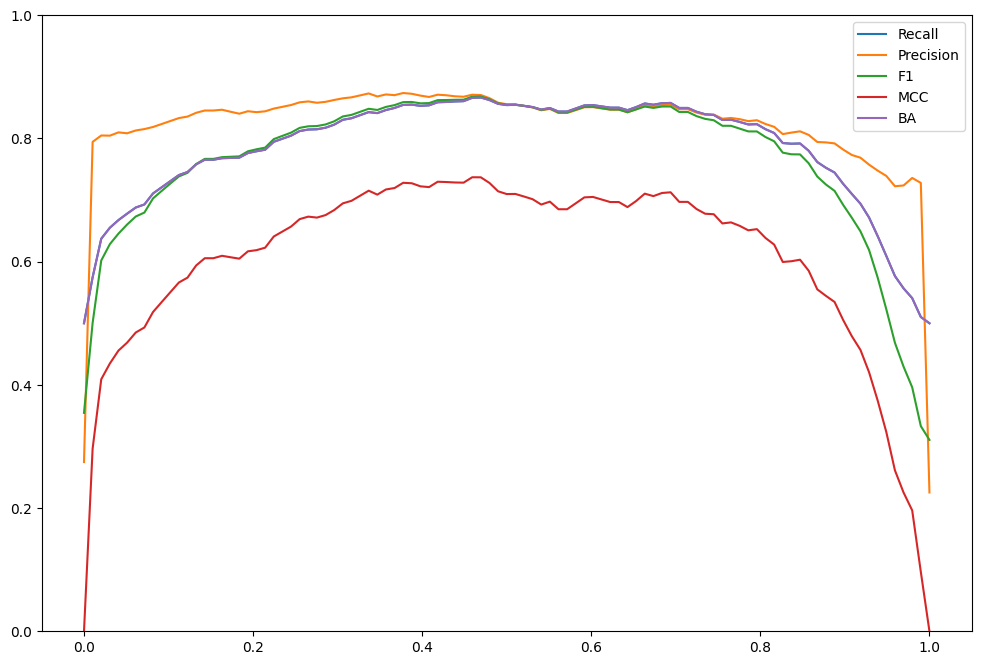

In [43]:
plt.figure(figsize = (12, 8))
plt.ylim(0, 1)
sns.lineplot(x = thresholds, y = recalls, label = 'Recall')
sns.lineplot(x = thresholds, y = precisions, label = 'Precision')
sns.lineplot(x = thresholds, y = f1s, label = 'F1')
sns.lineplot(x = thresholds, y = mccs, label = 'MCC')
sns.lineplot(x = thresholds, y = bas, label = 'BA')
plt.legend()

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

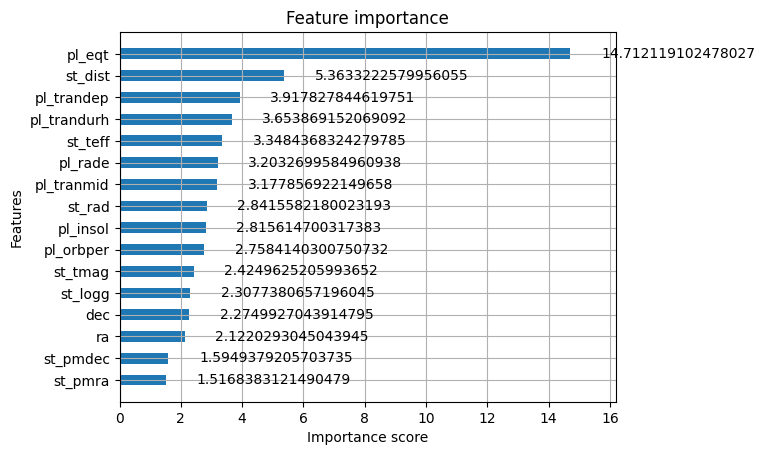

In [44]:
xgboost.plot_importance(xgbmodel, importance_type="gain", height=0.5)